In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
%cd "/content/drive/MyDrive/Hust/Age-Gender-Prediction"

/content/drive/MyDrive/Hust/Age-Gender-Prediction


In [6]:
!unzip "./archive.zip" -d '/content/'

unzip:  cannot find or open ./archive.zip, ./archive.zip.zip or ./archive.zip.ZIP.


## Imports

In [40]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import tensorflow as tf

## Data Loading

In [9]:
images = []
ages = []
genders = []

for i in os.listdir('/content/utkface_aligned_cropped/crop_part1/')[0:8000]:
    split = i.split('_')
    ages.append(int(split[0]))
    genders.append(int(split[1]))
    images.append(Image.open('/content/utkface_aligned_cropped/crop_part1/' + i))

In [10]:
images = pd.Series(list(images), name = 'Images')
ages = pd.Series(list(ages), name = 'Ages')
genders = pd.Series(list(genders), name = 'Genders')

df = pd.concat([images, ages, genders], axis=1)
df

,Images,Ages,Genders
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,46,1
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,4,1
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1,1
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,5,0
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,36,1
...,...,...,...
7995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,15,1
7996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,6,1
7997,<PIL.JpegImagePlugin.JpegImageFile image mode=...,31,1
7998,<PIL.JpegImagePlugin.JpegImageFile image mode=...,49,1


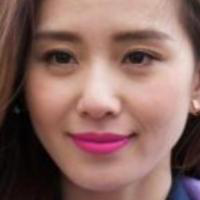

27 Female


In [27]:
display(df['Images'][102])
print(df['Ages'][102], 'Male' if df['Genders'][102] == 0 else 'Female')

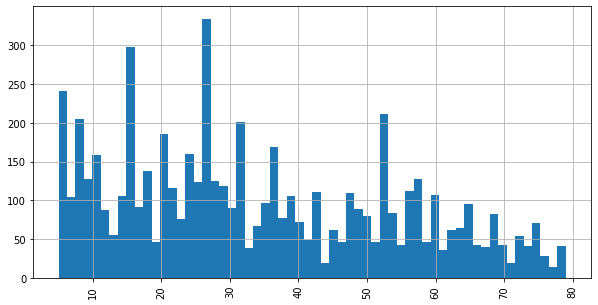

In [28]:
# histogram of df
df = df[df['Ages'] > 4]
df = df[df['Ages'] < 80]
df['Ages'].hist(bins=60, figsize=(10, 5), xrot=90)

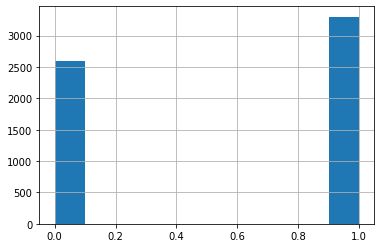

In [35]:
# histogram of df
df = df[df['Genders'] != 3]
df['Genders'].hist()

In [36]:
x = []
y = []

for i in range(len(df)):
    df['Images'].iloc[i] = df['Images'].iloc[i].resize((200,200), Image.ANTIALIAS)
    ar = np.asarray(df['Images'].iloc[i])
    x.append(ar)
    agegen = [int(df['Ages'].iloc[i]), int(df['Genders'].iloc[i])]
    y.append(agegen)

x = np.array(x)


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [37]:
# Train Test split
y_age =  np.array(df['Ages'])
y_gender = np.array(df['Genders'])

x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(x, y_age, test_size=0.2, stratify=y_age)
x_train_gender, x_test_gender, y_train_gender, y_test_gender = train_test_split(x, y_gender, test_size=0.2, stratify=y_gender)

## Training Model

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 23, 23, 128)     

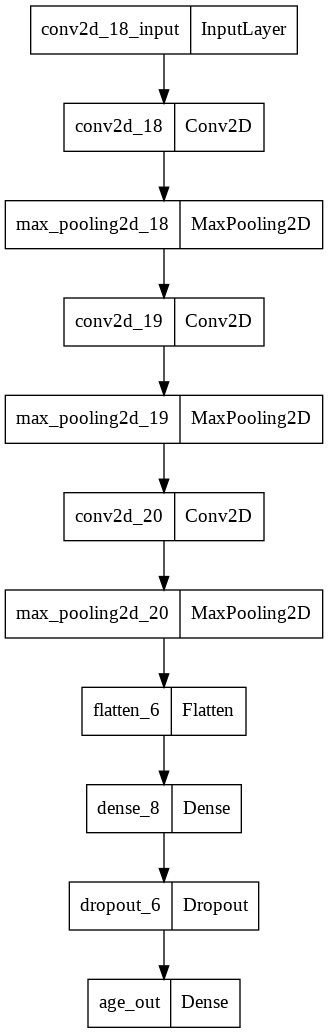

In [49]:
agemodel = Sequential()
agemodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(64, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Conv2D(128, (3,3), activation='relu'))
agemodel.add(MaxPooling2D((2,2)))
agemodel.add(Flatten())
agemodel.add(Dense(64, activation='relu'))
agemodel.add(Dropout(0.5))
agemodel.add(Dense(1, activation='relu', name='age_out'))

agemodel.compile(loss='mean_squared_error', optimizer=optimizers.Adam(lr=0.0001))
agemodel.summary()
plot_model(agemodel)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 99, 99, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 48, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 23, 23, 128)     

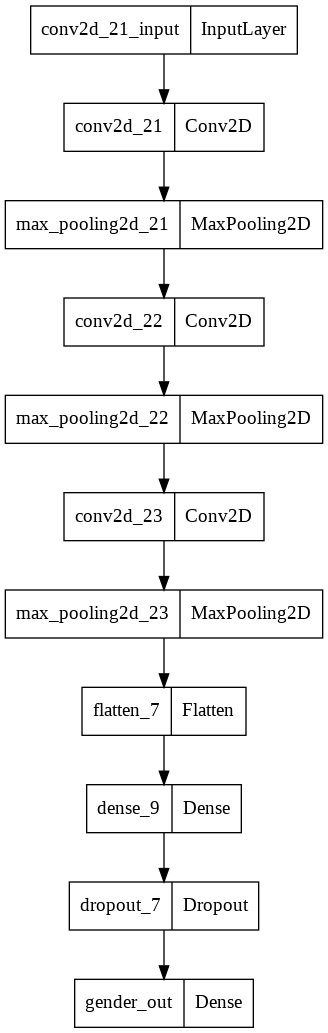

In [50]:
genmodel = Sequential()
genmodel.add(Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(64, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Conv2D(128, (3,3), activation='relu'))
genmodel.add(MaxPooling2D((2,2)))
genmodel.add(Flatten())
genmodel.add(Dense(64, activation='relu'))
genmodel.add(Dropout(0.5))
genmodel.add(Dense(1, activation='sigmoid', name='gender_out'))

genmodel.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.0001), metrics=['accuracy'])
genmodel.summary()
plot_model(genmodel)

In [ ]:
# Data Generate
datagen = ImageDataGenerator(
      rescale=1./255., width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train1 = datagen.flow(x_train_age, y_train_age, batch_size=32)

test1 = test_datagen.flow(
        x_test_age, y_test_age,
        batch_size=32)

history1 = agemodel.fit(train1, epochs=50, shuffle=True, validation_data=test1)

Epoch 1/50
148/148 [==============================] - 49s 265ms/step - loss: 558.9518 - val_loss: 427.1829
Epoch 2/50
148/148 [==============================] - 40s 268ms/step - loss: 460.1345 - val_loss: 402.9893
Epoch 3/50
148/148 [==============================] - 37s 253ms/step - loss: 444.5817 - val_loss: 362.6988
Epoch 4/50
148/148 [==============================] - 37s 253ms/step - loss: 404.0769 - val_loss: 313.9061
Epoch 5/50
148/148 [==============================] - 39s 262ms/step - loss: 371.5811 - val_loss: 306.9366
Epoch 6/50
148/148 [==============================] - 41s 279ms/step - loss: 355.2415 - val_loss: 297.5063
Epoch 7/50
148/148 [==============================] - 44s 296ms/step - loss: 350.5269 - val_loss: 335.4228
Epoch 8/50
148/148 [==============================] - 39s 261ms/step - loss: 346.0948 - val_loss: 293.7697
Epoch 9/50
148/148 [==============================] - 37s 252ms/step - loss: 334.9973 - val_loss: 269.1070
Epoch 10/50
148/148 [================

In [ ]:
train2 = datagen.flow(x_train_gender, y_train_gender, batch_size=64)

test2 = test_datagen.flow(
        x_test_gender, y_test_gender,
        batch_size=64)

history2 = genmodel.fit(train2, epochs=30, shuffle=True, validation_data=test2)

In [ ]:
agemodel.save("checkpoints/agemodel.h5")
genmodel.save("checkpoints/genmodel.h5")

In [ ]:
def process_and_predict(file):
    im = Image.open(file)
    width, height = im.size
    if width == height:
        im = im.resize((200,200), Image.ANTIALIAS)
    else:
        if width > height:
            left = width/2 - height/2
            right = width/2 + height/2
            top = 0
            bottom = height
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
        else:
            left = 0
            right = width
            top = 0
            bottom = width
            im = im.crop((left,top,right,bottom))
            im = im.resize((200,200), Image.ANTIALIAS)
            
    ar = np.asarray(im)
    ar = ar.astype('float32')
    ar /= 255.0
    ar = ar.reshape(-1, 200, 200, 3)
    
    age = agemodel.predict(ar)
    gender = np.round(genmodel.predict(ar))
    if gender == 0:
        gender = 'male'
    elif gender == 1:
        gender = 'female'
        
    print('Age:', int(age), '\n Gender:', gender)
    return im.resize((300,300), Image.ANTIALIAS)

-------------------------------------------------------------------------------✈

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

%cd "/content/drive/MyDrive/Hust/Age-Gender-Prediction"


In [ ]:
import os

import tensorflow as tf
from tensorflow import keras

from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt

model = tf.keras.models.load_model("checkpoints/model.h5")
%cd "./testimg"

In [ ]:
%ls

In [ ]:
def testimg(path):
    image = cv2.imread(path, 0)
    image = cv2.resize(image,dsize=(64,64))
    image = image.reshape((image.shape[0],image.shape[1],1))
    display(image)
    res = get_result(image)
    return

In [ ]:
testimg("phuong0.png")
testimg("phuong1.png")
testimg("mixi.png")
testimg("thuytien.png")
testimg("nguoiyeucu.png")
testimg("evans.png")
testimg("littlegirl.png")
